In [22]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import f1_score



In [23]:
df = pd.read_csv('../artifacts/processed_data.csv')

In [24]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,10251,360000.0,2,1,1,41,1,-1,-1,-2,...,-102.801966,-102.801966,-102.801966,1901.836380,0.000000,0.000000,0.000000,0.000000,0.000000,1
46724,25243,250000.0,1,1,1,49,-2,-2,-2,-2,...,186.966964,388.725618,587.525935,2389.153801,389.358157,186.966964,388.725618,587.525935,1798.077861,1
46725,24961,20000.0,1,2,1,36,1,2,1,1,...,18082.904047,19992.281459,20013.475785,0.000000,2920.207831,586.766114,2304.197551,1651.814544,884.744645,1
46726,10698,360000.0,2,1,2,34,1,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


Text(0.5, 1.0, 'Defaulters')

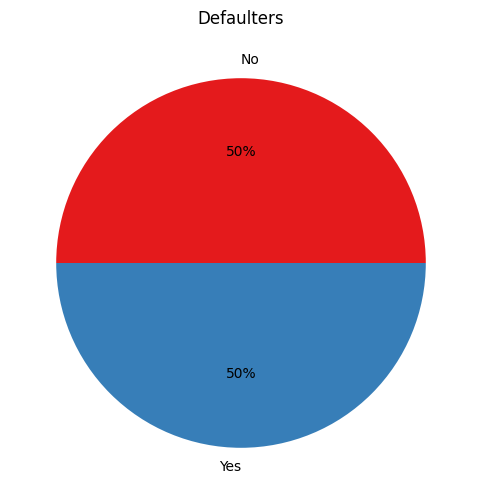

In [25]:
plt.figure(figsize=(6, 6))
plt.pie( df['Defaulter'].value_counts(), labels=['No', 'Yes'], autopct='%1.0f%%',colors=sns.color_palette('Set1'))
plt.title('Defaulters')


In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Defaulter'],
      dtype='object')

In [27]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [28]:
df['MARRIAGE'].unique()

array([1, 2, 3])

In [29]:
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'},
                  'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

In [30]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000.0,FEMALE,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,FEMALE,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,FEMALE,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,FEMALE,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,MALE,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [31]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Defaulter'],
      dtype='object')

#### Scaling Data using Standard Scaler

In [32]:
numerical_features = df.columns.drop(['Defaulter','MARRIAGE','EDUCATION',"SEX",'ID'])
categorical_features = ['SEX','MARRIAGE','EDUCATION']

In [33]:
numerical_features

Index(['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR'],
      dtype='object')

In [34]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000.0,FEMALE,University,Married,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.0,FEMALE,University,Single,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.0,FEMALE,University,Single,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,4,50000.0,FEMALE,University,Married,37,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,5,50000.0,MALE,University,Married,57,-1,0,-1,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,10251,360000.0,FEMALE,Graduate School,Married,41,1,-1,-1,-2,...,-102.801966,-102.801966,-102.801966,1901.836380,0.000000,0.000000,0.000000,0.000000,0.000000,1
46724,25243,250000.0,MALE,Graduate School,Married,49,-2,-2,-2,-2,...,186.966964,388.725618,587.525935,2389.153801,389.358157,186.966964,388.725618,587.525935,1798.077861,1
46725,24961,20000.0,MALE,University,Married,36,1,2,1,1,...,18082.904047,19992.281459,20013.475785,0.000000,2920.207831,586.766114,2304.197551,1651.814544,884.744645,1
46726,10698,360000.0,FEMALE,Graduate School,Single,34,1,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [35]:
x= df.drop(['Defaulter'],axis=1)
y= df['Defaulter']

In [36]:
num_transformer = StandardScaler()


In [37]:
df.groupby('Defaulter')

In [38]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, numerical_features),
                                                  ('cat', OneHotEncoder(), categorical_features)])
pipeline = Pipeline([('processor', preprocessor)])
pipeline.fit(x)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['SEX', 'MARRIAGE',
                                                   'EDUCATION'])]))])

In [39]:
x_scaled = pipeline.transform(x)

#### Splitting Data into Train and Test using Split train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

#### Logistic Regression

In [41]:
# param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [42]:
# grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
# grid_lr.fit(X_train, y_train)

In [43]:
# grid_lr.best_params_

In [44]:
# grid_lr.best_score_

#### SVC

In [56]:
param_grid = {
                    'n_estimators':[100,200,300,400,500,1000,10000],
                    'criterion':['gini','entropy'],
                    'max_depth':[2,3,4,5,6,7,8],
                    'min_samples_split':[2,3,4,5,6,7,8],
                    'min_samples_leaf':[2,3,4,5,6,7,8],
                }

In [57]:
grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4802 candidates, totalling 14406 fits
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.708 total time=   1.6s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.704 total time=   1.6s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.705 total time=   1.7s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.701 total time=   3.0s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.704 total time=   3.1s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.703 total time=   3.2s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.700 total time=   4.7s
[CV

KeyboardInterrupt: 

In [53]:
grid_clf.best_score_

0.8205692622825521

In [54]:
grid_clf.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [49]:
# model = SVC(C= 100, kernel='rbf')
# model = LogisticRegression(C= 0.1, penalty='l2')

In [55]:
model.fit(X_train,y_train)

NameError: name 'model' is not defined

In [ ]:
yt_pred = model.predict(X_train)

In [ ]:
f1_score(y_train,yt_pred)

0.7252379649058783

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

0.7251816834826783